In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score
import datetime as dt
import math
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
read_train_file = pd.read_excel ('E:\\python\\train_agriculture.xlsx')
read_train_file.to_csv ('E:\\python\\train_agriculture_converted.csv', index = None, header=True)

In [3]:
#Here we have converted train input .xlsx files into .csv format and have loaded it.

In [4]:
read_train_file.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [5]:
read_train_file.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [6]:
read_train_file.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

In [7]:
read_train_file['Number_Weeks_Used'] = read_train_file['Number_Weeks_Used'].fillna(read_train_file['Number_Weeks_Used'].mean())
read_train_file['Number_Weeks_Used'] = read_train_file['Number_Weeks_Used'].apply(np.floor)

In [8]:
read_train_file['Number_Weeks_Used']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
4594    28.0
4595    47.0
4596     7.0
4597    20.0
4598    33.0
Name: Number_Weeks_Used, Length: 4599, dtype: float64

In [9]:
read_train_file

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,28.0,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [10]:
read_train_file.drop('ID',axis=1,inplace=True)
#Since ID column has unique value of data entry, we are going to drop this column.

In [11]:
read_train_file

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.0,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


<AxesSubplot:>

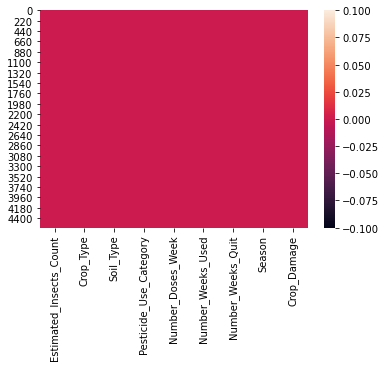

In [12]:
sns.heatmap(read_train_file.isnull())  # heatmap also indicates that there are no null values in dataset.

In [13]:
read_train_file.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [14]:
#since difference between mean and std is not big, this indicates that data is not highly skewed.

Estimated_Insects_Count       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Crop_Type                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Soil_Type                  AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Pesticide_Use_Category        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Number_Doses_Week          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number_Weeks_Used          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number_Weeks_Quit                AxesSubplot(0.125,0.125;0.227941x0.222059)
Season                        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Crop_Damage                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

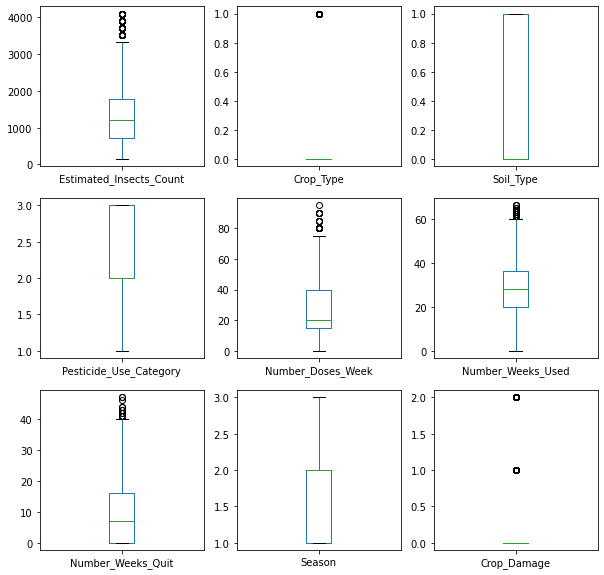

In [15]:
read_train_file.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

In [16]:
#from above figures we can see that there are outliers present in 'Estimated_Insects_Count','Number_Doses_Week',
#'Numbner_Weeks_Used' and in 'Number_Weeks_quit' for which we need to work upon

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(read_train_file))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [18]:
data_new = read_train_file[(z<3).all(axis = 1)]

In [19]:
data_new.shape

(4370, 9)

In [20]:
read_train_file.shape

(4599, 9)

In [21]:
#We can see that of outliers are rmeoved by using score mothed, there is almost 5% data loss but since our data set is big
# we will remove outliers
read_train_file = data_new

Estimated_Insects_Count       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Crop_Type                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Soil_Type                  AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Pesticide_Use_Category        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Number_Doses_Week          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number_Weeks_Used          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number_Weeks_Quit                AxesSubplot(0.125,0.125;0.227941x0.222059)
Season                        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Crop_Damage                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

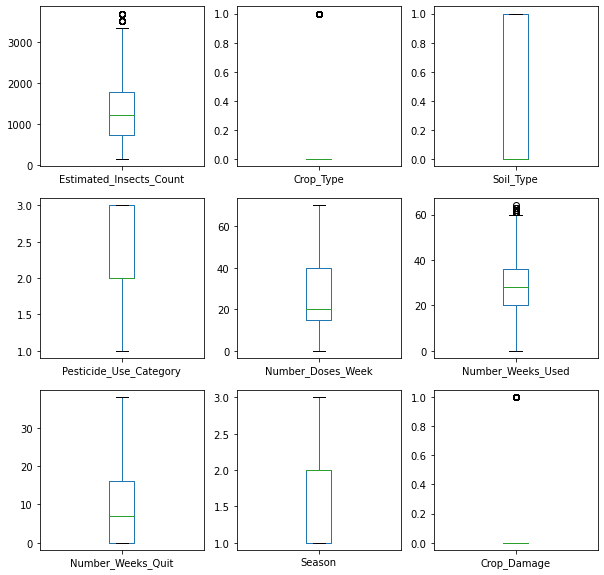

In [22]:
read_train_file.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

In [23]:
#Now we can see there are outlers present in only 'Estimated_Insects_Count' and 'Number_Weeks_Used' columns only.

In [24]:
read_train_file.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.297574
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

In [25]:
#Above skewness also indicates that data is not highly disperse/skewed

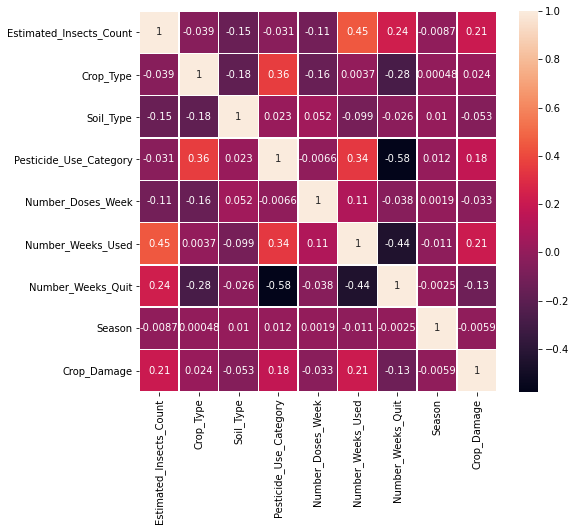

In [26]:
corr= read_train_file.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr,annot=True,linewidths=.5)
plt.show()

In [27]:
#Above heatmap indicates that columns 'Number_Weeks_used' and 'Number_Weeks_Quit' are very negatively correlated with each other

<AxesSubplot:ylabel='Frequency'>

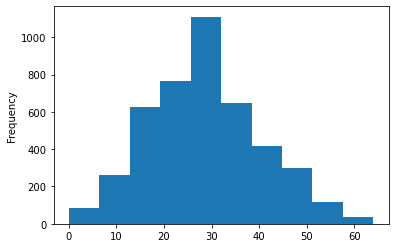

In [28]:
read_train_file['Number_Weeks_Used'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

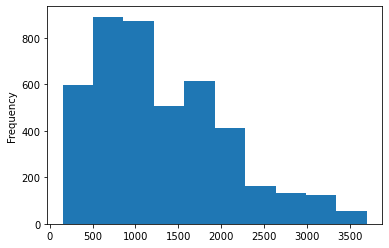

In [29]:
read_train_file['Estimated_Insects_Count'].plot.hist()

In [30]:
#We can see 'Estimated_Insects_Count' column is right skewed and hence we are going to treat skewnesss 

In [31]:
x = read_train_file.iloc[:,0:-1]

In [32]:
x.shape

(4370, 8)

In [33]:
y = read_train_file.iloc[:,-1]

In [34]:
y.shape

(4370,)

In [35]:
from sklearn.preprocessing import power_transform
read_train_file= power_transform(read_train_file, method = 'yeo-johnson')

In [36]:
models = [KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
max_score = 0
for i in range(1,100):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=i)
    for j in models:
        j.fit(train_x,train_y)
        pred=j.predict(test_x)
        temp_score=accuracy_score(pred,test_y)
        if temp_score > max_score:
            max_score = temp_score
            final_temp_state = i
            best_model = j
print("Best accuracy score is:",max_score,"of model:",best_model,"with best random state value is:",final_temp_state)

Best accuracy score is: 0.8775743707093822 of model: SVC() with best random state value is: 71


In [37]:
kernel = ['rbf','poly']
for i in kernel:
    svc=SVC(kernel = i)
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
    svc.fit(train_x,train_y)
    predsvc = svc.predict(test_x)
    #print("Predicted values using DecisionTree model:\n",preddtc)
    print("Accuracy score using kerner:",i,"is :",accuracy_score(predsvc,test_y))

Accuracy score using kerner: rbf is : 0.8775743707093822
Accuracy score using kerner: poly is : 0.8775743707093822


In [38]:
# from above we can see that accuracy score is same by using both options of kernel parameter of SVC algorithm and hence we will
#use default version of kernel i.e rbf

In [39]:
svc=SVC()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
svc.fit(train_x,train_y)
predsvc = svc.predict(test_x)
#print("Predicted values using SVC model:\n",predsvc)
#print("Actul values are:", test_y)
print("Accuracy score:",accuracy_score(predsvc,test_y))
print("Confusion matrix:\n", confusion_matrix(test_y, predsvc))
print("Classification report:",classification_report(test_y,predsvc))

Accuracy score: 0.8775743707093822
Confusion matrix:
 [[767   0]
 [107   0]]
Classification report:               precision    recall  f1-score   support

           0       0.88      1.00      0.93       767
           1       0.00      0.00      0.00       107

    accuracy                           0.88       874
   macro avg       0.44      0.50      0.47       874
weighted avg       0.77      0.88      0.82       874



In [40]:
cross_score=cross_val_score(svc,x,y,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score is=",cross_score.std())

Cross validation score is= [0.85469108 0.85354691 0.85354691 0.85354691 0.85354691]
Cross validation mean score is= 0.8537757437070939
Cross validation standard deviation score is= 0.00045766590389013646


In [41]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [42]:
abc = AdaBoostClassifier(n_estimators=50,base_estimator=svc,learning_rate=1,algorithm='SAMME')
#dtc=DecisionTreeClassifier()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.20,random_state=final_temp_state)
abc.fit(train_x,train_y)
predabc = abc.predict(test_x)
print("Accuracy score:",accuracy_score(predabc,test_y))
#print("Predicted values using AdaBoostClassifier model:\n",predabc)
#print("Accuracy score:",accuracy_score(predabc,test_y))

Accuracy score: 0.8775743707093822


In [43]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
temp_score = 0
temp_rate = 0
for i in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=i, max_features=2, max_depth=2, random_state=final_temp_state)
    gb_clf.fit(train_x,train_y)   
    score = gb_clf.score(test_x, test_y)
    if score > temp_score:
        temp_score = score
        temp_rate = i
print("Best learnin rate is:",temp_rate)
print("Best learning score is:",temp_score)

Best learnin rate is: 0.5
Best learning score is: 0.8844393592677345


In [44]:
gb_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=temp_rate, max_features=2, max_depth=2, random_state=final_temp_state)
gb_clf.fit(train_x,train_y)
predgb = gb_clf.predict(test_x)
#score = gb_clf.score(test_x, test_y)
print("Accuracy score:",accuracy_score(predgb,test_y))

Accuracy score: 0.8844393592677345


In [45]:
cross_score=cross_val_score(gb_clf,x,y,cv=5)
print("Cross validation score is=",cross_score)
print("Cross validation mean score is=",cross_score.mean())
print("Cross validation standard deviation score is=",cross_score.std())

Cross validation score is= [0.82951945 0.84668192 0.86727689 0.85354691 0.84668192]
Cross validation mean score is= 0.8487414187643021
Cross validation standard deviation score is= 0.012203470595856624


In [46]:
# By looking at accuracy score and cross validation mean score of SVC and GradientBoosting which are almost same we will
# be using GradientBoosting algorithm for our final model.

In [47]:
from sklearn.metrics import roc_auc_score,roc_curve

[0.         0.         0.         0.00130378 0.00130378 0.00521512
 0.00521512 0.00782269 0.00782269 0.00912647 0.00912647 0.01043025
 0.01043025 0.01173403 0.01173403 0.01564537 0.01564537 0.01694915
 0.01694915 0.02346806 0.02346806 0.03389831 0.03389831 0.03780965
 0.03780965 0.04432855 0.04432855 0.04563233 0.04563233 0.04693611
 0.04693611 0.04954368 0.04954368 0.05345502 0.05345502 0.05606258
 0.05606258 0.05867014 0.05867014 0.06258149 0.06258149 0.06388527
 0.06388527 0.07040417 0.07170795 0.07301173 0.07301173 0.07431551
 0.07431551 0.0756193  0.0756193  0.07953064 0.07953064 0.08344198
 0.08344198 0.08474576 0.08604954 0.08735332 0.08735332 0.08996089
 0.08996089 0.09256845 0.10169492 0.10560626 0.11212516 0.11212516
 0.11734029 0.11734029 0.12907432 0.12907432 0.15254237 0.15384615
 0.15514993 0.1577575  0.16949153 0.17079531 0.17079531 0.17209909
 0.17209909 0.17601043 0.17601043 0.18252934 0.18252934 0.19556714
 0.19556714 0.20208605 0.20338983 0.20338983 0.20730117 0.2099

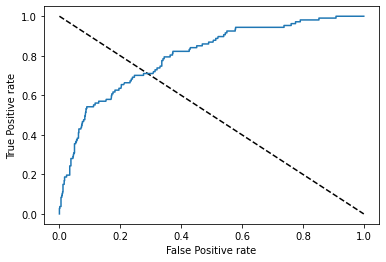

In [48]:
probability = gb_clf.predict_proba(test_x)[:,1]
probability
fpr,tpr,threshold = roc_curve(test_y,probability,pos_label=True)
print(fpr)
print(tpr)
print(threshold)
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = "GradientBoostClassifier")
plt.xlabel("False Positive rate")
plt.ylabel("True Positive rate")
plt.show()

In [49]:
import pickle
filename = 'E:\\python\\agriculture_prediction.pkl'
pickle.dump(gb_clf,open(filename,'wb'))

# Test data logic starts here 

In [50]:
read_test_file = pd.read_excel ('E:\\python\\test_agriculture.xlsx')
read_test_file.to_csv ('E:\\python\\test_agriculture_converted.csv', index = None, header=True)

#Here we have converted train input .xlsx files into .csv format and have loaded it.

In [51]:
read_test_file.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [52]:
read_test_file.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

In [53]:
read_test_file.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [54]:
read_test_file['Number_Weeks_Used'] = read_test_file['Number_Weeks_Used'].fillna(read_test_file['Number_Weeks_Used'].mean())
read_test_file['Number_Weeks_Used'] = read_test_file['Number_Weeks_Used'].apply(np.floor)

In [55]:
read_test_file.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [56]:
read_test_file.drop('ID',axis=1,inplace=True)

In [57]:
read_test_file.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,188,1,1,1,0,29.0,0,2
1,410,1,1,1,0,0.0,0,2
2,626,1,0,1,0,0.0,0,2
3,731,1,0,1,0,0.0,0,2
4,789,0,0,1,0,0.0,0,1


In [58]:
fitted_model = pickle.load(open(filename,'rb'))

In [59]:
fitted_model

GradientBoostingClassifier(learning_rate=0.5, max_depth=2, max_features=2,
                           n_estimators=50, random_state=71)

In [60]:
test_prediction = fitted_model.predict(read_test_file)

In [61]:
test_prediction

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [62]:
test_prediction_file = pd.DataFrame(test_prediction)

In [63]:
test_prediction_file.to_csv("E:\\python\\agriculture_prediction.csv",header=0)